# STAT40800 Data Programming with Python - Final Project

**Name & Student ID: Clementine Surya & 22200226**

For this project, I analyse data from the Allen Institute, a bioscience research institute located in Seattle. 
Three datasets have been provided for this project:
- neurons group 1.csv: contains information about the morphology of a group
of brain cell, known as neurons.
- neurons group 2.csv: contains information about the morphology of a second
group of neurons.
- neurons additional measurements.csv: contains additional morphology measurements for the neurons included in neurons group 1.csv and neurons group 2.csv.

In [1]:
#First I load in necessary packages for this project:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy.random as npr
import scipy.stats as stats
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

## Question 1


**(a) Load the neurons group 1.csv dataset into Python as a pandas DataFrame.**

In [2]:
#First of all, I load the neuron_group_1.csv dataset as 
#a pandas DataFrame using below code
path = 'finalproject/'
df_neurons1 = pd.read_csv(path+'neurons_group_1.csv')

#Then, I check the first five row of the dataset
print(df_neurons1.head())

          id  average_diameter  overall_depth  overall_height  overall_width  \
0  484775243          0.195628        90.3529      548.798070     257.109717   
1  485996843          0.457635        87.0383      717.408343     199.214267   
2  486041253          0.295455        75.3286      584.083922     386.076695   
3  491119181          0.414033        89.0718      284.641670     239.492610   
4  491119245          0.201323        44.5237      302.038542     323.493562   

   soma_surface  total_length  total_surface  total_volume  
0    128.269219   3658.629571    2252.681880    115.626135  
1    430.635072   4158.819949    5944.196007    730.014704  
2    502.033948   2667.618389    2472.795020    197.063796  
3    383.828302   1543.941010    2008.838025    237.466517  
4    120.229052   1621.871325    1027.220686     54.521240  


**(b) Inspect the data. How many neurons are included in this dataset? How many
different measurements are included? Does this dataset contain any missing values?**

There are 311 neurons entries with 8 measurements in neurons_group_1 dataset which are:
1) Average diameter, 2) Overall depth, 3) Overall height, 4) Overall width, 5) Soma surface, 6) Total length, 7) Total surface, and 8) Total volume.

There are 9 columns in this dataset and this dataset do not contain any missing values.

In [3]:
#Below is the code that I use to show the information of the dataset
print(df_neurons1.info())
print(df_neurons1.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                311 non-null    int64  
 1   average_diameter  311 non-null    float64
 2   overall_depth     311 non-null    float64
 3   overall_height    311 non-null    float64
 4   overall_width     311 non-null    float64
 5   soma_surface      311 non-null    float64
 6   total_length      311 non-null    float64
 7   total_surface     311 non-null    float64
 8   total_volume      311 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 22.0 KB
None
(311, 9)


In [4]:
#Here, I count the missing values in each column of the dataset and 
#as we can see there is no missing values in this data set
df_neurons1.isna().sum()

id                  0
average_diameter    0
overall_depth       0
overall_height      0
overall_width       0
soma_surface        0
total_length        0
total_surface       0
total_volume        0
dtype: int64

**(c) Perform an exploratory data analysis, creating both numerical and graphical summaries of the data. Discuss and interpret your results.**

In [5]:
#Here, I show the numerical summary for each of the neuron measurements
print(df_neurons1.describe())

                 id  average_diameter  overall_depth  overall_height  \
count  3.110000e+02        311.000000     311.000000      311.000000   
mean   5.885866e+08          0.421175      91.967024      523.516774   
std    8.490396e+07          0.159435      35.658760      299.256684   
min    4.847752e+08          0.053899      22.680000       82.836871   
25%    4.961239e+08          0.322128      64.574450      328.964661   
50%    5.912744e+08          0.415613      86.212200      469.151885   
75%    6.568502e+08          0.527572     115.566350      651.885452   
max    8.460831e+08          1.156730     183.960000     1928.118350   

       overall_width  soma_surface  total_length  total_surface  total_volume  
count     311.000000    311.000000    311.000000     311.000000    311.000000  
mean      320.548089    361.849689   3792.940198    5492.737135    808.488483  
std       124.039953    253.912293   2775.993259    5719.713426   1190.466808  
min        49.173247      2.895

Then, I make interpretation based on the numerical summary I obtain:


- The average diameter has a mean of 0.42 and standard deviation of 0.16. The median (0.42) is approximately equal to the mean, indicating that its distribution is symmetric.
- The overall depth has a mean of 91.97 and standard deviation of 35.66. The median (86.21) is lower than the mean, indicating that the distribution is right skewed.
- The overall height has a mean of 523.52 and standard deviation of 299.26. The median (469.15) is lower than the mean, indicating that the distribution is right skewed.
- The overall width has a mean of 320.55 and standard deviation of 124.04. The median (291.53) is lower than the mean, indicating that the distribution is right skewed.
- The soma surface has mean of 361.85 and standard deviation of 253.91. The median (311.57) is lower than the mean, indicating that the distribution is right skewed.
- The total length has mean of 3792.94 and standard deviation of 2775.99. The median (2946.86) is lower than the mean, indicating that the distribution is rigth skewed.
- The total surface has mean of 5492.74 and standard deviation of 5719.71. The median (3636.76) is significantly lower than the mean, indicating that the distribution is rigth skewed.
- The total volume has mean of 808.49 and standard deviaion of 1190.47. The median (407.18) is significantly lower than the mean, indicating that the distribution is rigth skewed.

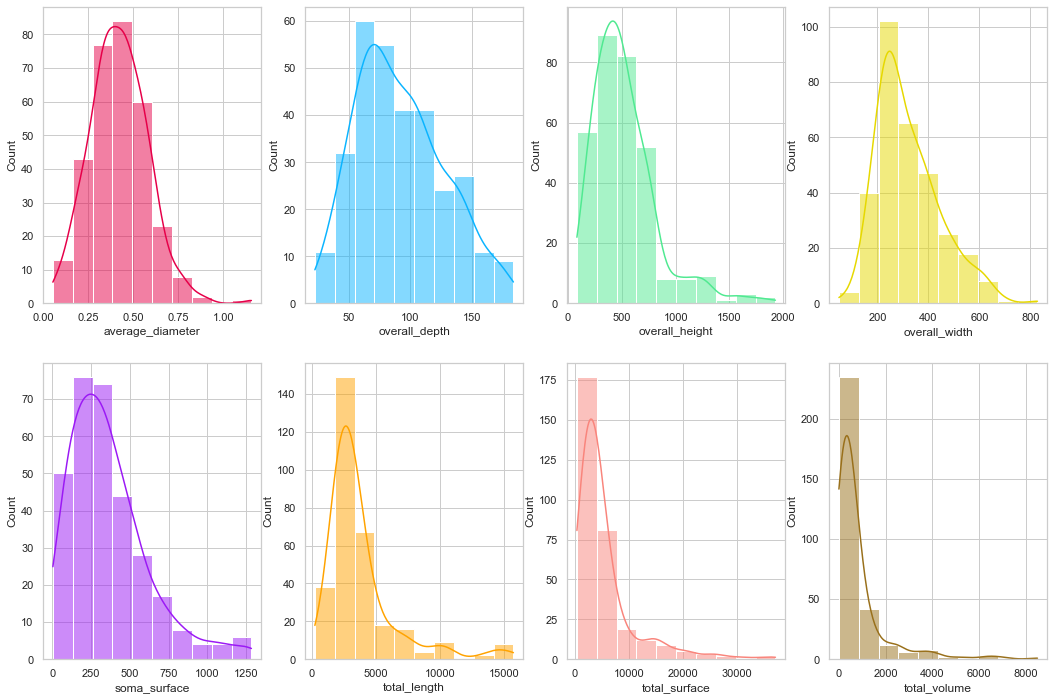

In [6]:
#Below, I show the graphical summaries of this dataset measurements
sns.set(style="whitegrid")

fig,axs = plt.subplots(2,4, figsize = (18,12))

sns.histplot(data=df_neurons1, 
             x="average_diameter", 
             kde=True, 
             color="#e60049", 
             ax=axs[0, 0], 
             bins =10).set(xlabel ="average_diameter")
sns.histplot(data=df_neurons1, 
             x="overall_depth", 
             kde=True, 
             color="#0bb4ff", 
             ax=axs[0, 1], 
             bins =10).set(xlabel ="overall_depth")
sns.histplot(data=df_neurons1, 
             x="overall_height", 
             kde=True, 
             color="#50e991", 
             ax=axs[0, 2], 
             bins =10).set(xlabel ="overall_height")
sns.histplot(data=df_neurons1, 
             x="overall_width", 
             kde=True, 
             color="#e6d800", 
             ax=axs[0, 3], 
             bins =10).set(xlabel ="overall_width")
sns.histplot(data=df_neurons1, 
             x="soma_surface", 
             kde=True, 
             color="#9b19f5", 
             ax=axs[1, 0], 
             bins =10).set(xlabel ="soma_surface")
sns.histplot(data=df_neurons1, 
             x="total_length", 
             kde=True, 
             color="#ffa300", 
             ax=axs[1, 1], 
             bins =10).set(xlabel ="total_length")
sns.histplot(data=df_neurons1, 
             x="total_surface", 
             kde=True, 
             color="#f9857c", 
             ax=axs[1, 2], 
             bins =10).set(xlabel ="total_surface")
sns.histplot(data=df_neurons1, 
             x="total_volume", 
             kde=True, 
             color="#99701b", 
             ax=axs[1, 3], 
             bins =10).set(xlabel ="total_volume")

plt.show()

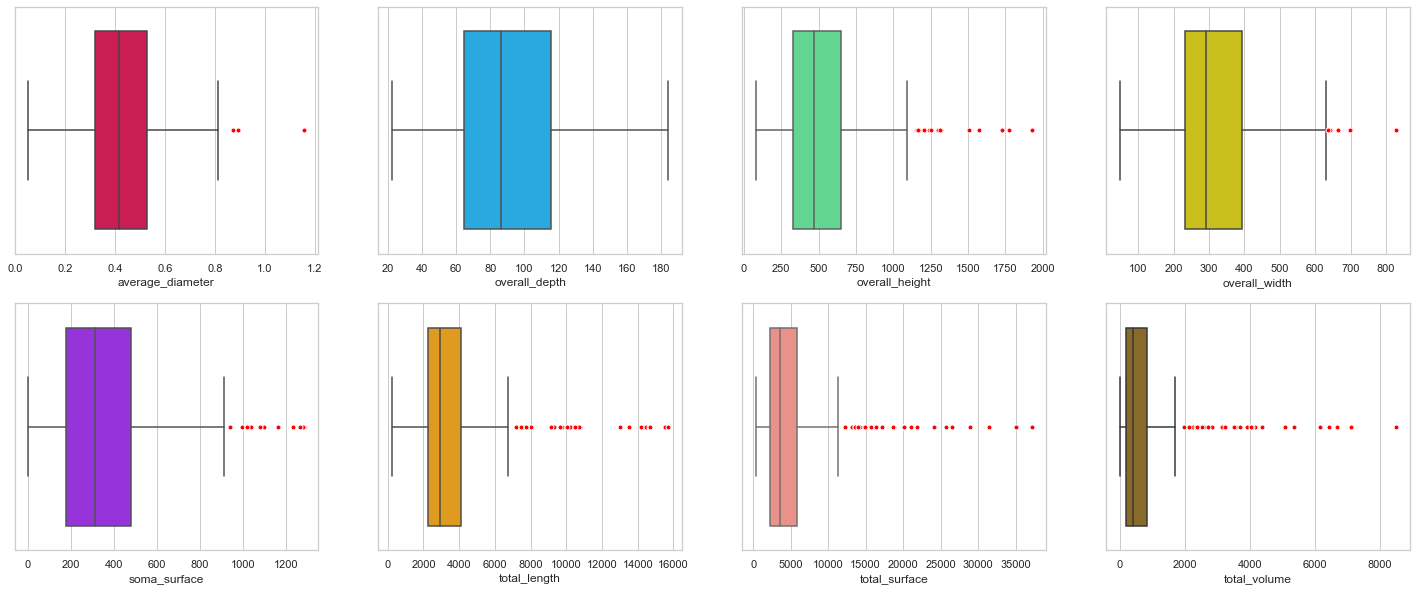

In [7]:
#I create boxplot neuron measurements summary with below code:
sns.set(style="whitegrid")  

#Change the outlier marker to color red
red_circle = dict(markerfacecolor = 'red', 
                  marker='o',
                  markeredgecolor='white')

fig,axs = plt.subplots(2,4, figsize = (25,10))
sns.boxplot(data=df_neurons1, 
            x="average_diameter",
            color="#e60049", 
            flierprops = red_circle, 
            ax=axs[0, 0]).set(xlabel ="average_diameter")
sns.boxplot(data=df_neurons1, 
            x="overall_depth",
            color="#0bb4ff", 
            flierprops = red_circle, 
            ax=axs[0, 1]).set(xlabel ="overall_depth")
sns.boxplot(data=df_neurons1, 
            x="overall_height", 
            color="#50e991", 
            flierprops = red_circle, 
            ax=axs[0, 2]).set(xlabel ="overall_height")
sns.boxplot(data=df_neurons1, 
            x="overall_width", 
            color="#e6d800", 
            flierprops = red_circle, 
            ax=axs[0, 3]).set(xlabel ="overall_width")
sns.boxplot(data=df_neurons1, 
            x="soma_surface", 
            color="#9b19f5", 
            flierprops = red_circle, 
            ax=axs[1, 0]).set(xlabel ="soma_surface")
sns.boxplot(data=df_neurons1, 
            x="total_length", 
            color="#ffa300", 
            flierprops = red_circle, 
            ax=axs[1, 1]).set(xlabel ="total_length")
sns.boxplot(data=df_neurons1, 
            x="total_surface", 
            color="#f9857c", 
            flierprops = red_circle, 
            ax=axs[1, 2]).set(xlabel ="total_surface")
sns.boxplot(data=df_neurons1, 
            x="total_volume", 
            color="#99701b", 
            flierprops = red_circle, 
            ax=axs[1, 3]).set(xlabel ="total_volume")

plt.show()

Here, I do interpretation based on the graphical summary for each of the neurons measurement and connect it with the numerical summary. To sum up:

- Average diameter measurement has a symmetrical distribution, which is also shown in the numerical summary part, where the mean and median are both around 0.42. There are several outliers located above the maximum value in this distribution. The spread of the middle distribution is between 0.32 and 0.53 (IQR range of 0.21) and it is ranging from 0.05 to 1.16 (range value of 1.11).
- Overall depth measurement has a right skewed distribution, which is also shown in the numerical summary part, where the mean of overall depth measurement (91.97) is bigger than its median (86.21). The spread of the middle distribution is between 64.57 and 115.57 (IQR range of 51) and it is ranging from 22.68 to 183.96 (range value of 161.28).
- Overall height measurement has a right skewed distribution, which is also shown in the numerical summary part, where the mean of overall height measurement (523.52) is bigger than its median (469.15). There are several outliers located above the maximum value in this distribution. The spread of the middle distribution is between 328.96 and 651.89 (IQR range of 322.93) and it is ranging from 82.84 to 1928.12 (range value of 1845.28).
- Overall width measurement has a right skewed distribution, which is also shown in the numerical summary part, where the mean of overall width measurement (320.55) is bigger than its median (291.53). There are several outliers located above the maximum value in this distribution. The spread of the middle distribution is between 233.48 and 392.53 (IQR range of 159.05) and it is ranging from 49.17 to 827.75 (range value of 778.58).
- Soma surface measurement has a right skewed distribution, which is also shown in the numerical summary part, where the mean of soma surface measurement (361.85) is bigger than its median (311.57). There are many outliers located above the maximum value in this distribution. The spread of the middle distribution is between 176.19 and 478.80 (IQR range of 302.61) and it is ranging from 2.90 to 1283.72 (range value of 1280.82).
- Total length measurement has a right skewed distribution, which is also shown in the numerical summary part, where the mean of total length measurement (3792.94) is bigger than its median (2946.86). There are many outliers located above the maximum value in this distribution. The spread of the middle distribution is between 2237.03 and 4085.69 (IQR range of 1848.66) and it is ranging from 251.99 and 15697.42 (range value of 15445.43).
- Total surface has a right skewed distribution, which is also shown in the numerical summary part, where the mean of total surface measurement (5492.74) is bigger than its median (3636.76). There are many outliers located above the maximum value in this distribution. The spread of the middle distribution is between 2253.63 and 5895.66 (IQR range of 3642.03) and it is ranging from 402.24 and 37182.28 (range value 36780.04).
- Total volume has a right skewed distribution, which is also shown in the numerical summary part, where the mean of total volume measurement (808.49) is bigger than its median (407.18). There are many outliers located above the maximum value in this distribution. The spread of the middle distribution is between 197.07 and 833.68 (IQR range of 636.61) and it is ranging from 4.31 and 8482.06 (range value 8477.75).

## Question 2

**(a) Load the neurons group 2.csv dataset into Python as a pandas DataFrame.**

In [8]:
#I load the neuron_group_2.csv dataset as 
#a pandas DataFrame using below code
path = 'finalproject/'
df_neurons2 = pd.read_csv(path+'neurons_group_2.csv')

#I show the first 5 rows of the dataset
print(df_neurons2.head())

          id  average_diameter  overall_depth  overall_height  overall_width  \
0  397905347          0.316091       117.5429      585.602322     287.122628   
1  491119234          0.331268        81.9012      461.280515     275.146120   
2  491119269          0.139015        57.5697      324.422347     280.851229   
3  491119394          0.230412        76.0357      368.298267     251.377567   
4  491119419          0.321163        98.8344      417.890620     193.590563   

   soma_surface  total_length  total_surface  total_volume  
0    268.777679   3498.090031    3523.606841    306.290931  
1    551.788645   2008.302439    2097.688550    188.431435  
2     50.092109   1774.258366     776.076427     25.733000  
3    244.457685   1650.188964    1198.531518     75.823080  
4    252.423672   2066.369729    2085.789861    180.446414  


**(b) Inspect the data. How many neurons are included in this dataset? Are the measurements the same as those in neurons group 1.csv?** 

There are 390 neurons entries and 8 measurements in neuron_group_2 dataset. The measurements are the same as those in neurons group1.csv, where there are 8 measurements:
1) Average diameter, 2) Overall depth, 3) Overall height, 4) Overall width, 5) Soma surface, 6) Total length, 7) Total surface, and 8) Total volume.

There are 9 columns in this dataset and this dataset do not contain any missing values.

In [9]:
#Below is the code that I use to show the information of the dataset
print(df_neurons2.info())
print(df_neurons2.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                390 non-null    int64  
 1   average_diameter  390 non-null    float64
 2   overall_depth     390 non-null    float64
 3   overall_height    390 non-null    float64
 4   overall_width     390 non-null    float64
 5   soma_surface      390 non-null    float64
 6   total_length      390 non-null    float64
 7   total_surface     390 non-null    float64
 8   total_volume      390 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 27.5 KB
None
(390, 9)


In [10]:
#Here, I count the missing values in each column of the dataset and 
#as we can see there is no missing values in this data set
df_neurons2.isna().sum()

id                  0
average_diameter    0
overall_depth       0
overall_height      0
overall_width       0
soma_surface        0
total_length        0
total_surface       0
total_volume        0
dtype: int64

**(c) Perform a t-test, for each of the measurements, to test whether any of the neuron
properties differ between the group 1 and group 2. Use a significance level of α =
0.01. Display the t-score and p-value for each measurement. Clearly state the
conclusion of your tests and explain your reasoning.**

In this section, I perform t-test for each measurements. A t-test is an inferential statistic used to determine if there is a significant difference between the means of two groups and how they are related$^1$. Hence, I would like to test whether any of the neuron properties differ between the group 1 and group 2. I use significance level of α = 0.01.

The hypothesis testing that we use is:

$H_0$: There is no difference in the neuron measurement means between the two groups

$H_A$: There is a difference in the neuron means between the two groups


We can see from the T-test result below that all the neurons measurement have p-value greater than α = 0.01, we fail to reject the null hypothesis. Thus, we can conclude that there is no difference in the measurements means between neurons1 and neurons2 dataset.

**T-test for average diameter measurement**

$H_0$: There is no difference in the average diameter means between the two groups

$H_A$: There is a difference in the average diameter means between the two groups

As we can see from the result below, the T-score is 1.197 and p-value= 0.23 which is greater than α = 0.01. Thus, we fail to reject the null hyphothesis. This also indicates that there is no difference in the average diameter means between between neurons1 and neurons2 dataset.

In [11]:
stats.ttest_ind(df_neurons1['average_diameter'], df_neurons2['average_diameter'])

Ttest_indResult(statistic=-1.1970075781748382, pvalue=0.23170939849935634)

**T-test for overall depth measurement**

$H_0$: There is no difference in the overall depth means between the two groups

$H_A$: There is a difference in the overall depth means between the two groups

As we can see from the result below, the T-score is 1.19 and p-value= 0.24 which is greater than α = 0.01. Thus, we fail to reject the null hyphothesis. This also indicates that there is no difference in the overall depth means between neurons1 and neurons2 dataset. 

In [12]:
stats.ttest_ind(df_neurons1['overall_depth'], df_neurons2['overall_depth'])

Ttest_indResult(statistic=-1.1857230913955603, pvalue=0.23613458215666971)

**T-test for overall height measurement**

$H_0$: There is no difference in the overall height means between the two groups

$H_A$: There is a difference in the overall height means between the two groups

As we can see from the result below, the T-score is 0.59 and p-value= 0.56 which is greater than α = 0.01. Thus, we fail to reject the null hyphothesis. This also indicates that there is no difference in the overall height means between neurons1 and neurons2 dataset.

In [13]:
stats.ttest_ind(df_neurons1['overall_height'], df_neurons2['overall_height'])

Ttest_indResult(statistic=0.5860348440044614, pvalue=0.5580412742530052)

**T-test for overall width measurement**

$H_0$: There is no difference in the overall width means between the two groups

$H_A$: There is a difference in the overall width means between the two groups

As we can see from the result below, the T-score is 0.92 and p-value= 0.36 which is greater than α = 0.01. Thus, we fail to reject the null hyphothesis. This also indicates that there is no difference in the overall width measurement between neurons1 and neurons2 dataset.

In [14]:
stats.ttest_ind(df_neurons1['overall_width'], df_neurons2['overall_width'])

Ttest_indResult(statistic=-0.9231920391791176, pvalue=0.3562256919514518)

**T-test for soma surface measurement**

$H_0$: There is no difference in the soma surface means between the two groups

$H_A$: There is a difference in the soma surface means between the two groups

As we can see from the result below, the T-score is 0.55 and p-value= 0.58 which is greater than α = 0.01. Thus, we fail to reject the null hyphothesis. This also indicates that there is no difference in the soma surface means between neurons1 and neurons2 dataset.

In [15]:
stats.ttest_ind(df_neurons1['soma_surface'], df_neurons2['soma_surface'])

Ttest_indResult(statistic=-0.547797643314149, pvalue=0.5840057333717408)

**T-test for total length measurement**

$H_0$: There is no difference in the total length means between the two groups

$H_A$: There is a difference in the total length means between the two groups

As we can see from the result below, the T-score is 0.33 and p-value= 0.74 which is greater than α = 0.01. Thus, we fail to reject the null hyphothesis. This also indicates there is no difference in the total length means between neurons1 and neurons2 dataset.

In [16]:
stats.ttest_ind(df_neurons1['total_length'], df_neurons2['total_length'])

Ttest_indResult(statistic=-0.332599650604377, pvalue=0.7395362277560685)

**T-test for total surface measurement**

$H_0$: There is no difference in the total surface means between the two groups

$H_A$: There is a difference in the total surface means between the two groups

As we can see from the result below, the T-score is 0.82 and p-value= 0.42 which is greater than α = 0.01. Thus, we fail to reject the null hyphothesis. This also indicates there is no difference in the total surface means between neurons1 and neurons2 dataset.

In [17]:
stats.ttest_ind(df_neurons1['total_surface'], df_neurons2['total_surface'])

Ttest_indResult(statistic=-0.8152397825540432, pvalue=0.4152127535605644)

**T-test for total volume measurement**

$H_0$: There is no difference in the total volume means between the two groups

$H_A$: There is a difference in the total volume means between the two groups

As we can see from the result below, the T-score is 0.93 and p-value is 0.35 which is greater than α = 0.01. Thus, we fail to reject the null hyphothesis. This also indicates there is no difference in the total volume means between neurons1 and neurons2 dataset.

In [18]:
stats.ttest_ind(df_neurons1['total_volume'], df_neurons2['total_volume'])

Ttest_indResult(statistic=-0.9313735524535135, pvalue=0.35198192808008355)

## Question 3

**(a) Load the neurons additional measurements.csv into Python and combine all
three datasets into a single DataFrame.**

After loading the neurons additional measurement dataset with below code, we can see that there are 694 neurons and 13 columns in this dataset with 12 neuron measurements. All the measurements are different from the measurements in neurons1 and neurons2 datasets. The 12 measurements in this additional dataset are average bifurcation angle local, average contraction, average fragmentation, average parent daughter ratio, max branch order, max euclidean distance, max path distance, number bifurcations, number branches, number nodes, number stems, and number tips.

In [19]:
#I load the neurons_additional_measurements.csv dataset as a pandas DataFrame using below code
path = 'finalproject/'
df_neurons_additional = pd.read_csv(path+'neurons_additional_measurements.csv')

#I show the 5 five rows of this dataset
print(df_neurons_additional.head())

          id  average_bifurcation_angle_local  average_contraction  \
0  491119743                        82.727781             0.864267   
1  546781359                        82.506680             0.903890   
2  537042261                        77.536678             0.863104   
3  689123605                        76.583222             0.900537   
4  657879305                        72.019250             0.873518   

   average_fragmentation  average_parent_daughter_ratio  max_branch_order  \
0              20.723077                       0.964510                 6   
1             105.277778                       0.862183                 3   
2              73.666667                       0.926633                 6   
3              95.979167                       0.942049                11   
4              47.535714                       1.000000                 5   

   max_euclidean_distance  max_path_distance  number_bifurcations  \
0               99.779724         126.593790   

In [20]:
#Show the information of this additional dataset and 
#the shape of the dataset using below code
print(df_neurons_additional.info())
print(df_neurons_additional.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 694 entries, 0 to 693
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               694 non-null    int64  
 1   average_bifurcation_angle_local  694 non-null    float64
 2   average_contraction              694 non-null    float64
 3   average_fragmentation            694 non-null    float64
 4   average_parent_daughter_ratio    694 non-null    float64
 5   max_branch_order                 694 non-null    int64  
 6   max_euclidean_distance           694 non-null    float64
 7   max_path_distance                694 non-null    float64
 8   number_bifurcations              694 non-null    int64  
 9   number_branches                  694 non-null    int64  
 10  number_nodes                     694 non-null    int64  
 11  number_stems                     694 non-null    int64  
 12  number_tips           

Here, I combine neurons1 and neurons2 dataset together. We can see that there are 701 neurons entries and 9 columns in the combined dataset of neurons1 and neurons2 with 8 neurons measurement that we have already seen in part 1 and part 2 questions.

In [21]:
#I use append function to combine neuron_group_1 
#and neuron_group_2 datasets
df_neurons1_neurons2 = df_neurons1.append(df_neurons2)

#Here, I show the information and dimension of the combine dataset 
#of neuron_group_1 and neuron_group_2 datasets
print(df_neurons1_neurons2.info())
print(df_neurons1_neurons2.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 701 entries, 0 to 389
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                701 non-null    int64  
 1   average_diameter  701 non-null    float64
 2   overall_depth     701 non-null    float64
 3   overall_height    701 non-null    float64
 4   overall_width     701 non-null    float64
 5   soma_surface      701 non-null    float64
 6   total_length      701 non-null    float64
 7   total_surface     701 non-null    float64
 8   total_volume      701 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 54.8 KB
None
(701, 9)


After that, I merge the df_neurons1_neurons2 dataset with df_neurons_additional dataset and make a new dataset that contains all of the data called df_neurons_all.

In [22]:
#Merge df_neurons1_neurons2 dataset with df_neurons_additional dataset using "inner" 
#This keeps only the common values in both 
#df_neurons1_neurons2 and df_neurons_additional dataset 
#for the merged data
df_neurons_all = pd.merge(df_neurons1_neurons2,
                          df_neurons_additional,on=['id'],how = 'inner')

#Show the 5 row of this dataset
print(df_neurons_all.head())

          id  average_diameter  overall_depth  overall_height  overall_width  \
0  484775243          0.195628        90.3529      548.798070     257.109717   
1  485996843          0.457635        87.0383      717.408343     199.214267   
2  486041253          0.295455        75.3286      584.083922     386.076695   
3  491119181          0.414033        89.0718      284.641670     239.492610   
4  491119245          0.201323        44.5237      302.038542     323.493562   

   soma_surface  total_length  total_surface  total_volume  \
0    128.269219   3658.629571    2252.681880    115.626135   
1    430.635072   4158.819949    5944.196007    730.014704   
2    502.033948   2667.618389    2472.795020    197.063796   
3    383.828302   1543.941010    2008.838025    237.466517   
4    120.229052   1621.871325    1027.220686     54.521240   

   average_bifurcation_angle_local  ...  average_fragmentation  \
0                        78.026948  ...              48.081967   
1             

**(b) Comment on the dimensions of the combined dataset. Are all of the neurons from
group 1 and 2 included in the dataset neurons additional measurements.csv?**

The dimensions of the combined dataset are 694 neurons entries and 21 column. From above part, we know that the neurons entries from neuron_group_1 are 311 and the neurons entries from neuron_group_2 are 390. The total neuron entries of neuron_group_1 and neuron_group_2 are 701. This means that there are 7 neurons from group 1 and 2 that are not included in the dataset of neurons additional measurements.csv. With the result shown below, we know that there are 5 neurons and 2 neurons that are not included in the combined dataset from neuron_group_1 and neuron_group_2 respectively.

We need to take note that this combined dataset does not contain any missing values because of the "inner" function when merging the dataset in previous section. Hence, this keeps only the common neurons "id" values in the combined dataset (proven below that there is no missing value).

In [23]:
#Show the information and dimension of the dataset
print(df_neurons_all.info())
print(df_neurons_all.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 694 entries, 0 to 693
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               694 non-null    int64  
 1   average_diameter                 694 non-null    float64
 2   overall_depth                    694 non-null    float64
 3   overall_height                   694 non-null    float64
 4   overall_width                    694 non-null    float64
 5   soma_surface                     694 non-null    float64
 6   total_length                     694 non-null    float64
 7   total_surface                    694 non-null    float64
 8   total_volume                     694 non-null    float64
 9   average_bifurcation_angle_local  694 non-null    float64
 10  average_contraction              694 non-null    float64
 11  average_fragmentation            694 non-null    float64
 12  average_parent_daughte

In [24]:
#Check any neurons in dataset 1 and 2 
#that are not included in additional dataset
check_group1 = df_neurons1['id'].isin(df_neurons_additional['id'])
missing_group1 = check_group1.value_counts()[False]

check_group2 = df_neurons2['id'].isin(df_neurons_additional['id'])
missing_group2 = check_group2.value_counts()[False]

print("Number of neurons not included from Group 1:", missing_group1)
print("Number of neurons not included from Group 2:", missing_group2)

Number of neurons not included from Group 1: 5
Number of neurons not included from Group 2: 2


In [25]:
df_neurons_all.isna().sum()

id                                 0
average_diameter                   0
overall_depth                      0
overall_height                     0
overall_width                      0
soma_surface                       0
total_length                       0
total_surface                      0
total_volume                       0
average_bifurcation_angle_local    0
average_contraction                0
average_fragmentation              0
average_parent_daughter_ratio      0
max_branch_order                   0
max_euclidean_distance             0
max_path_distance                  0
number_bifurcations                0
number_branches                    0
number_nodes                       0
number_stems                       0
number_tips                        0
dtype: int64

**(c) Compute the Pearson correlation coefficient between each of the measurements and
identify which morphological features are strongly correlated. List the four most
strongly correlated pairs.**

In this part, I compute the Pearson correlation coefficient between each of the measurements and
identify which morphological features are strongly correlated. 

The result below shown that, the four most strongly correlated pairs are number nodes and total length (correlation: 0.998333), number tips and number branches (0.998230), number branches and number bifuractions (0.997993), and number tips and number bifuractions (0.992465).

In [26]:
neurons_numeric = df_neurons_all.drop(['id'],axis=1)
neurons_cor = neurons_numeric.corr()
print(neurons_cor)

                                 average_diameter  overall_depth  \
average_diameter                         1.000000       0.229786   
overall_depth                            0.229786       1.000000   
overall_height                           0.327179       0.527627   
overall_width                            0.367010       0.515622   
soma_surface                             0.589195       0.238661   
total_length                             0.352461       0.566376   
total_surface                            0.619391       0.482570   
total_volume                             0.658883       0.405527   
average_bifurcation_angle_local          0.039447      -0.067234   
average_contraction                     -0.262180      -0.168192   
average_fragmentation                    0.353716       0.420348   
average_parent_daughter_ratio            0.274922       0.004063   
max_branch_order                         0.172831       0.496938   
max_euclidean_distance                   0.30027

In [27]:
#Retain upper triangular values of correlation matrix and
#make Lower triangular values Null
upper_corr_mat = neurons_cor.where(
    np.triu(np.ones(neurons_cor.shape), k=1).astype(bool))
  
#Convert to 1-D series and drop Null values
unique_corr_pairs = upper_corr_mat.unstack().dropna()
  
#Sort correlation pairs
sorted_mat = unique_corr_pairs.sort_values()
print(sorted_mat)

average_contraction            average_diameter                  -0.262180
                               average_bifurcation_angle_local   -0.256651
average_fragmentation          average_contraction               -0.232868
number_stems                   average_parent_daughter_ratio     -0.222174
average_parent_daughter_ratio  average_contraction               -0.196380
                                                                    ...   
max_path_distance              max_euclidean_distance             0.989598
number_tips                    number_bifurcations                0.992465
number_branches                number_bifurcations                0.997993
number_tips                    number_branches                    0.998230
number_nodes                   total_length                       0.998333
Length: 190, dtype: float64


**(d) Creating scatterplot for the four most strongly correlated pairs.**

We can see from the scatterplots below that number nodes & total length pair, number tips & number branches pair, number branches & number bifurcations pair, and number tips & number bifurcations pair are all having **strong positive correlation** between each other as expected.

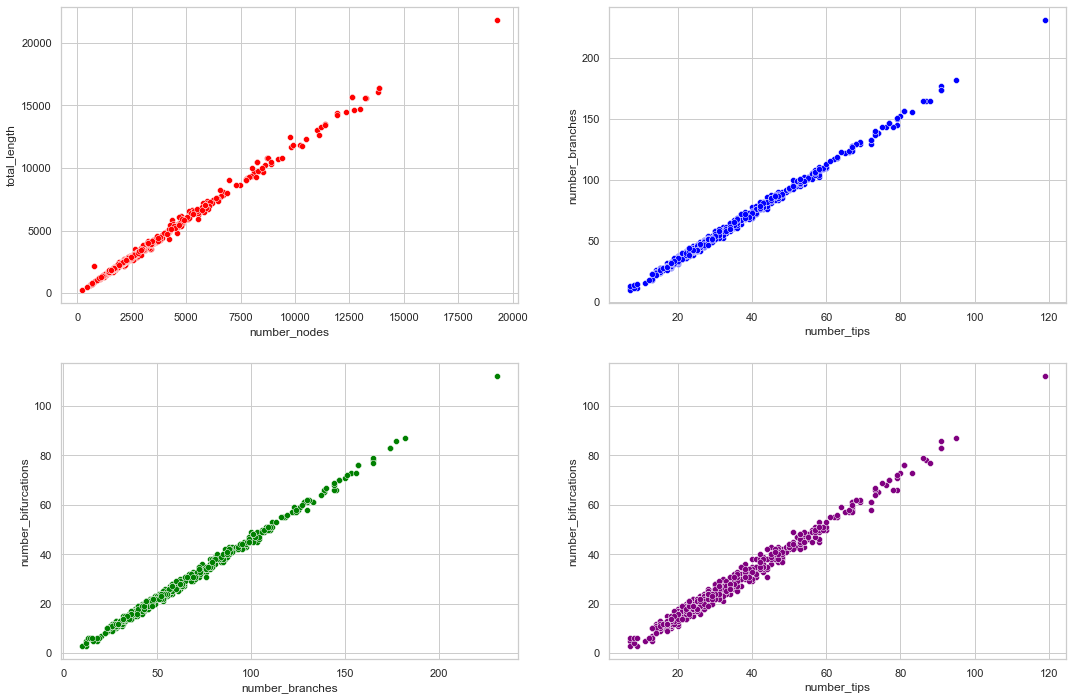

In [28]:
sns.set(style="whitegrid")

fig,axs = plt.subplots(2,2, figsize = (18,12))

#Scatterplot between number nodes and total length measurements
sns.scatterplot(data = df_neurons_all, 
                x = "number_nodes", 
                y ="total_length", 
                color = 'red', 
                ax=axs[0, 0])

#Scatterplot between number tips and number branches measurements
sns.scatterplot(data=df_neurons_all, 
                x="number_tips", 
                y="number_branches", 
                color = 'blue', 
                ax=axs[0, 1])

#Scatterplot between number branches and number bifurcations measurements
sns.scatterplot(data=df_neurons_all, 
                x="number_branches", 
                y="number_bifurcations", 
                color = 'green', 
                ax=axs[1, 0])

#Scatterplot between number tips and number bifurcations measurements
sns.scatterplot(data=df_neurons_all, 
                x="number_tips", 
                y="number_bifurcations", 
                color = 'purple', 
                ax=axs[1, 1])

plt.show()

## Question 4 - Linear regression to Predict the Total Surface Area of a Neuron


**(a) Separate the data into response and predictor variables and standardise the predictor
variables**

In this section, I separate the data into response and predictor variables and standardise the predictor variables.

In [29]:
#Create a Series y which contains the response variable (total suraface)
y = df_neurons_all.total_surface

#Create a DataFrame X that excludes id and 
#total surface and contains the explanatory variables:
#average diameter, overall depth, overall height, overall witdh,
#soma surface, total length, total volume
#average bifurcation angle local, average contraction, 
#average fragmentation, average parent daughter ratio
#max branch order, max euclidean distance, max path distance, 
#number bifurcations, number branches, 
#number nodes, number stems, number tips
X = df_neurons_all.drop(['id','total_surface'],axis=1)

#Standardise the predictor variable
X_std = (X-X.mean())/X.std()

#Add an intercept column to X in the first column
X_std.insert(0,'intercept',1)
X = X_std

**(b) Fit a linear regression model and interpret the fitted model**

Here I fit a linear regression model using statsmodels.api package that I have written in the "Load necessary package" part.

In [30]:
mod = sm.OLS(y,X)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:          total_surface   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     4465.
Date:                Sun, 11 Dec 2022   Prob (F-statistic):               0.00
Time:                        16:26:06   Log-Likelihood:                -5362.3
No. Observations:                 694   AIC:                         1.076e+04
Df Residuals:                     675   BIC:                         1.085e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
intercept 

**Interpreting the fitted models:**

First of all, I interpret the coefficient:

> The average diameter coefficient in the regression equation is 693.1540. This coefficient represents the mean increase of total surface for every additional unit in average diameter. If the average diameter increases by 1 unit, the average total surface increases by 693.1540 (holding all the other independent variables constant).

> The overall depth coefficient in the regression equation is -130.8024. This coefficient represents the mean decrease of total surface for every additional unit in overall depth. If the overall depth increases by 1 unit, the average total surface decreases by 130.8024 (holding all the other independent variables constant).

> The overall height coefficient in the regression equation is -296.8748. This coefficient represents the mean decrease of total surface for every additional unit in overall height. If the overall height increases by 1 unit, the average total surface decreases by 296.8748 (holding all the other independent variables constant).

> The overall width coefficient in the regression equation is 25.8528. This coefficient represents the mean increase of total surface for every additional unit in overall width. If the overall width increases by 1 unit, the average total surface increases by 25.8528 (holding all the other independent variables constant).

> The soma surface coefficient in the regression equation is 56.9857. This coefficient represents the mean increase of total surface for every additional unit in soma surface. If the soma surface increases by 1 unit, the average total surface increases by 56.9857 (holding all the other independent variables constant).

> The total length coefficient in the regression equation is 3956.4533. This coefficient represents the mean increase of total surface for every additional unit in total length. If the total length increases by 1 unit, the average total surface increases by 3956.4533 (holding all the other independent variables constant).

> The total volume coefficient in the regression equation is 2994.2462. This coefficient represents the mean increase of total surface for every additional unit in total volume. If the total volume increases by 1 unit, the average total surface increases by 2994.2462 (holding all the other independent variables constant).

> The average bifurcation angle local coefficient in the regression equation is -5.6851. This coefficient represents the mean decrease of total surface for every additional unit in average bifurcation angle local. If the average bifurcation angle local by 1 unit, the average total surface decreases by 5.6851 (holding all the other independent variables constant).

> The average contraction coefficient in the regression equation is 32.2640. This coefficient represents the mean increase of total surface for every additional unit in average contraction. If the average contraction increases by 1 unit, the average total surface increases by 32.2640 (holding all the other independent variables constant).

> The average fragmentation coefficient in the regression equation is -95.7414. This coefficient represents the mean decrease of total surface for every additional unit in average fragmentation. If the average fragmentation increases by 1 unit, the average total surface decreases by 95.7414 (holding all the other independent variables constant).

> The average parent daughter ratio coefficient in the regression equation is 54.8073. This coefficient represents the mean increase of total surface for every additional unit in average parent daughter ratio. If the average parent daughter ratio increases by 1 unit, the average total surface increases by 54.8073 (holding all the other independent variables constant).

> The max branch order coefficient in the regression equation is  -26.1737. This coefficient represents the mean decrease of total surface for every additional unit in max branch order. If the max branch order increases by 1 unit, the average total surface decreases by  26.1737 (holding all the other independent variables constant).

> The max euclidean distance coefficient in the regression equation is 636.0267. This coefficient represents the mean increase of total surface for every additional unit in max euclidean distance. If the max euclidean distance increases by 1 unit, the average total surface increases by 636.0267 (holding all the other independent variables constant).

> The max path distance coefficient in the regression equation is -346.6786. This coefficient represents the mean decrease of total surface for every additional unit in max path distance. If the max path distance increases by 1 unit, the average total surface decreases by 346.6786 (holding all the other independent variables constant).

> The number bifurcations distance coefficient in the regression equation is -3895.7825. This coefficient represents the mean decrease of total surface for every additional unit in number bifurcations. If the number bifurcations increases by 1 unit, the average total surface decreases by 3895.7825 (holding all the other independent variables constant).

> The number branches distance coefficient in the regression equation is 1985.8946. This coefficient represents the mean increase of total surface for every additional unit in number branches. If the number branches increases by 1 unit, the average total surface increases by 1985.8946 (holding all the other independent variables constant).

> The number nodes coefficient in the regression equation is -813.9945. This coefficient represents the mean decrease of total surface for every additional unit in number nodes. If the number nodes increases by 1 unit, the average total surface decreases by 813.9945 (holding all the other independent variables constant).

> The number stems coefficient in the regression equation is -458.2155. This coefficient represents the mean decrease of total surface for every additional unit in number stems. If the number stems increases by 1 unit, the average total surface decreases by 458.2155 (holding all the other independent variables constant).

> The number tips distance coefficient in the regression equation is 1897.7216. This coefficient represents the mean increase of total surface for every additional unit in number tips. If the number tips increases by 1 unit, the average total surface increases by 1897.7216 (holding all the other independent variables constant).

> When all the predictor measurements are equal to zero, the average total surface is 5705.7931. This does not make sense to interpret since it is not possible for neurons measurements to be zero. However, we still need to keep the intercept term in the model in order to use it to make predictions. The intercept just doesn’t have any meaningful interpretation for this model.


Second of all, I observe the p-value then comparing it with significance level of 5%. We can see that intercept, average diameter, overall depth, overall height, soma surface, total length, total volume, average parent daughter ratio, max euclidean distance, and number nodes have p-value < 0.05. Thus, these measurements are condidered as significant. This also indicates that relations exist between them with the total surface. 

Third of all, the AIC and BIC from this fitted model are 1.076 × 10$^4$ and 1.085 × 10$^4$ respectively. Later, we will compare this value with the forwardAIC and forwardBIC results. Lower AIC and BIC scores are better. AIC and BIC  penalizes models that use more parameters. So if two models explain the same amount of variation, the one with fewer parameters will have a lower AIC and BIC score and will be the better-fit model$^3$.

Lastly, I observe the adjusted $ R^2 $ in this fitted model which is 0.991. Thus, 99.1% of the variation in total surface can be explained by all the features in this data set.

**(c) Perform a forward selection Akaike Information Criterion (AIC) regression. Examine the selected model and discuss your findings in relation to the model fitted in part (b)**

From the forwardAIC result below, we can see that the important measurements that lower the AIC are: total volume, total length, average diameter, overall depth, number stems, number nodes, soma surface, average parent daughter ratio, average contraction, number bifurcations, average fragmentation, and overall width.

Based on the p-value, at significance level 5%, we see that the intercept, total volume, total length, average diameter, overall depth, number stems, number average parent daughter ratio, number bifurcations, average fragmentation are signicicant (p-value < 0.05). Indicating that relation exist between them with the total surface.

With this new AIC model, we have the same adjsuted $R^2$ with the previous model that includes all variables, which is 0.991. Thus, 99.1% of the variation in total surface can be explained by total volume, total length, average diameter, overall depth, number stems, number nodes, soma surface, average parent daughter ratio, average contraction, number bifurcations, average fragmentation, and overall width.

We can see from the fitted model using forwardAIC model that the AIC value is 1.077 × 10$^4$ which (increased slightly from the previous model) while the BIC value is 1.083e × 10$^4$ (decreased slightly from the previous model).

*The code of forwardAIC function below is from Week 9 Assessed Exercise Solution which return the column numbers of the X matrix for the model that gives the lowest AIC. The algorithm is as per below:*
1. Begin with a model that contains no variable (other than the intercept). 
Run a linear regression and record the AIC. For now, this is
our current model. 

2. Find the most significant variable, i.e. the variable that lowers the AIC the
most a. Run a linear regression with the current model plus one additional variable, and record
the decrease in AIC. b. Repeat step 2a for each variable not included in the current model. c. Find
the variable with the biggest decrease in AIC. d. Update the current model to include the variable
that decreases the AIC the most. 

3. If none of the variables lower the AIC then go to step 4.
Otherwise repeat step 2 until adding variables no longer reduces the AIC. 

4. Report your final
chosen variables

In [31]:
def forwardAIC(X,y):
    
    mod = sm.OLS(y, X.iloc[:,0]).fit()
    best_aic = mod.aic
    
    bad_model = True
    chosen_vars = [0]
    remaining_vars = range(1,X.shape[1])
    
    while(bad_model):
        curr_aic = np.empty(len(remaining_vars))
        curr_aic_diff = np.empty(len(remaining_vars))
        
        for count, i in enumerate(remaining_vars):
            curr_vars = np.append(chosen_vars,i)
            curr_mod = sm.OLS(y, X.iloc[:,curr_vars]).fit() 
            curr_aic[count] = curr_mod.aic

            curr_aic_diff[count] = curr_mod.aic - best_aic
        if len(remaining_vars)==0:
            bad_model=False
        elif np.min(curr_aic_diff)>0:
            bad_model = False
        else:
            best_var = remaining_vars[np.argmin(curr_aic_diff)]
            best_aic = curr_aic[np.argmin(curr_aic_diff)]
            chosen_vars = np.append(chosen_vars,best_var)
            remaining_vars = [x for x in remaining_vars if x != best_var]
    return chosen_vars    

In [32]:
ans_AIC = forwardAIC(X,y)
print(ans_AIC)
print(X.columns[ans_AIC])

[ 0  7  6  1  2 18 17  5 11  9 15 10  4]
Index(['intercept', 'total_volume', 'total_length', 'average_diameter',
       'overall_depth', 'number_stems', 'number_nodes', 'soma_surface',
       'average_parent_daughter_ratio', 'average_contraction',
       'number_bifurcations', 'average_fragmentation', 'overall_width'],
      dtype='object')


In [33]:
#Fit the linear regression using forwardAIC measurements
mod = sm.OLS(y, X.iloc[:,ans_AIC])
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:          total_surface   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     6583.
Date:                Sun, 11 Dec 2022   Prob (F-statistic):               0.00
Time:                        16:26:06   Log-Likelihood:                -5371.2
No. Observations:                 694   AIC:                         1.077e+04
Df Residuals:                     681   BIC:                         1.083e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
intercept     

**(d) Perform a forward selection Bayes Information Criterion (BIC) regression. Examine the selected model and discuss your findings in relation to the models fitted in part (b) and (c).**

From the forwardBIC result below, we can see that the important measurements that lower the BIC are: total volume, total length, average_diameter, overall_depth, number stems, number nodes.

Based on the p-value, at significance level 5%, we see that the intercept, total volume, total length, average diameter, overall depth, and number stems are signicicant (p-value < 0.05). Indicating that relation exist between these variables with the total surface.

With this new BIC model, we have the same adjsuted $R^2$ with the model that includes all variables and the AIC model, which is 0.991. Thus, 99.1% of the variation in total surface can be explained by all the variables in this data set.

We can see from the fitted model using forwardBIC model that the AIC value is 1.078 × 10$^4$ which (increased slightly from the previous model) while the BIC value is 1.081e × 10$^4$ (decreased slightly from the previous model).

*Here I use forwardBIC fuction that has the same algorithm like forwardAIC from Week 9 Assessed Exercise Solution. This return the column numbers of the X matrix for the model that gives the lowest BIC. The algorithm is as per below:*
1. Begin with a model that contains no variable (other than the intercept). 
Run a linear regression and record the BIC. For now, this is
our current model. 

2. Find the most significant variable, i.e. the variable that lowers the BIC the
most a. Run a linear regression with the current model plus one additional variable, and record
the decrease in BIC. b. Repeat step 2a for each variable not included in the current model. c. Find
the variable with the biggest decrease in BIC. d. Update the current model to include the variable
that decreases the BIC the most. 

3. If none of the variables lower the BIC then go to step 4.
Otherwise repeat step 2 until adding variables no longer reduces the AIC. 

4. Report your final
chosen variables

In [34]:
def forwardBIC(X,y):
    
    mod = sm.OLS(y, X.iloc[:,0]).fit()
    best_bic = mod.bic
    
    bad_model = True
    chosen_vars = [0]
    remaining_vars = range(1,X.shape[1])
    while(bad_model):
        curr_bic = np.empty(len(remaining_vars))
        curr_bic_diff = np.empty(len(remaining_vars))
        for count, i in enumerate(remaining_vars):
            curr_vars = np.append(chosen_vars,i)
            curr_mod = sm.OLS(y, X.iloc[:,curr_vars]).fit() 
            curr_bic[count] = curr_mod.bic
            curr_bic_diff[count] = curr_mod.bic - best_bic
        if len(remaining_vars)==0:
            bad_model=False
        elif np.min(curr_bic_diff)>0:
            bad_model = False
        else:
            best_var = remaining_vars[np.argmin(curr_bic_diff)]
            best_bic = curr_bic[np.argmin(curr_bic_diff)]
            chosen_vars = np.append(chosen_vars,best_var)
            remaining_vars = [x for x in remaining_vars if x != best_var]
    return chosen_vars  

In [35]:
ans_BIC = forwardBIC(X,y)
print(ans_BIC)
print(X.columns[ans_BIC])

[ 0  7  6  1  2 18 17]
Index(['intercept', 'total_volume', 'total_length', 'average_diameter',
       'overall_depth', 'number_stems', 'number_nodes'],
      dtype='object')


In [36]:
#Fit the linear regression using forwardBIC measurements
mod = sm.OLS(y, X.iloc[:,ans_BIC])
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:          total_surface   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 1.279e+04
Date:                Sun, 11 Dec 2022   Prob (F-statistic):               0.00
Time:                        16:26:06   Log-Likelihood:                -5384.2
No. Observations:                 694   AIC:                         1.078e+04
Df Residuals:                     687   BIC:                         1.081e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
intercept         5705.7931     21.609  

**(e) Explain how using BIC for model selection differs from using AIC**

AIC is an estimate of a constant plus the relative distance between the unknown true likelihood function of the data and the fitted likelihood function of the model, whereas BIC is an estimate of a function of the posterior probability of a model being true, under a certain Bayesian setup.

They consist of a goodness-of-fit term plus a penalty to control over-fitting, and provide a standardized way to balance between having enough parameters to adequately model the relationships among variables in the population (sensitivity) and not over-fitting a model or suggesting nonexistent relationships (specificity). Hence the smaller the AIC/BIC, the better the model.

AIC and BIC difference is the size of the penalty. BIC tends to be more restrictive when it comes to penalizing model complexity even though it is sometimes preferred over AIC for some of the reasons below:

1) BIC is consistent. A consistent selector is one which will select the true model with probability approaching 100% as n tends to infinity. AIC is not consistent because it has a non-vanishing chance of choosing an unnecessarily complex model as n becomes large.

2) BIC considers Type I and Type II errors to be about equally undesirable, while AIC considers Type II errors to be more undesirable than Type I errors unless n is very small. In classical hypothesis testing, over-fitting (Type I errors) are considered worse than Type II errors, whereas for prediction, a Type II error can be harmful as well.$^2$

## Question 5 - Random Forest Regression to Predict the Total Surface Area of a Neuron

**(a) Split the data into appropriate training and test sets.**



We have 694 observations so will split the data into training and test sets of size 521 and 173
respectively. Importantly, the data for each set must be selected randomly and each observation
must only appear in one of the sets.

In [37]:
#Setting the random seed
np.random.seed(123)

#Here I divide the train size with 75% for training purposes 
#and the remaining 25% for the test data
train_size = 521

#Create new data for X to be used for random forest regression 
#because we want to use the non-standardised dataset, X_rfr.
X_rfr = df_neurons_all.drop(['id','total_surface'],axis=1)
train_select = np.random.permutation(range(len(y)))
X_train = X_rfr.iloc[train_select[:train_size],:].reset_index(drop=True)
X_test = X_rfr.iloc[train_select[train_size:],:].reset_index(drop=True)

#Use the y data that we have already created in above part
#because it is not standardized
y_train = y[train_select[:train_size]].reset_index(drop=True)
y_test = y[train_select[train_size:]].reset_index(drop=True)

#reset_index drops the original row index and resets it, 
#such that the first row has index 0, second has index 1, and so on

**(b) Fit a random forest regression model with 10 trees using the training data. Include the argument random state=101 in the random forest regression function to ensure reproducible results. Determine which variables are most important in predicting the total surface area of a neuron. Discuss your findings in relation to the linear models fit in question 4.**

Here, I fit a random forest regression model to the training data with 10 trees and random state = 101 in the random forest regression function to ensure reproductible results. After that, I use feature importances attribute from the Random Forest Regressor to obtain the most important variable in predicting the total surface area of a neuron. 

We can see from the result below that by using random forest regression, the four variable that are important are total volume, number bifurcations, total length, and number nodes. We get the same result for variable Total Volume in AIC, BIC, and Random Forest Regression model that this variable came out as the most important variable in predicting total surface.

In [38]:
#First, I import RandomfForestRregressor 
#function from sklearn.ensemble
from sklearn.ensemble import RandomForestRegressor

#Initializing the Random Forest Regression model 
#with 10 decision trees and using random state 101 
#to ensure reproduciblee results
regressor = RandomForestRegressor(n_estimators = 10, random_state = 101)

#Fitting Random Forest Regression to the training dataset
reg = regressor.fit(X_train,y_train)

By using random forest regression model, the variables that are most important in predicting the total surface area of a neuron is total volume.

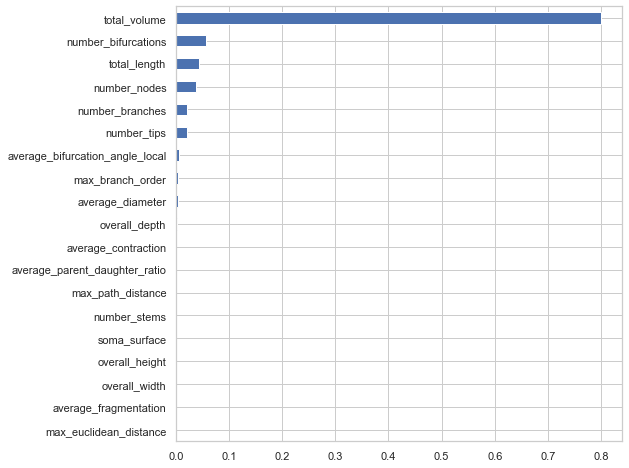

In [39]:
##Use feature_importances_ attribute from the Random Forest Regressor 
##to obtain the most important variable in 
#predicting the total surface area of a neuron
plt.figure(figsize=(8,8))
important_feature = pd.Series(reg.feature_importances_,index=X_train.columns).sort_values(ascending=True)
ax = important_feature.plot(kind='barh')
plt.show()

**(c) Use the random forest regression model to predict the total surface area of a neuron
for the test set. Create a scatter plot of the true surface area of a neuron versus the
predicted surface area. Interpret your plot.**

From the scatterplot below, we can see that  the true surface area of a neuron and the predicted surface area have a strong positive linear relationship between each other indicating that when true surface area increase, the predicted surface area increases in a similar fashion.

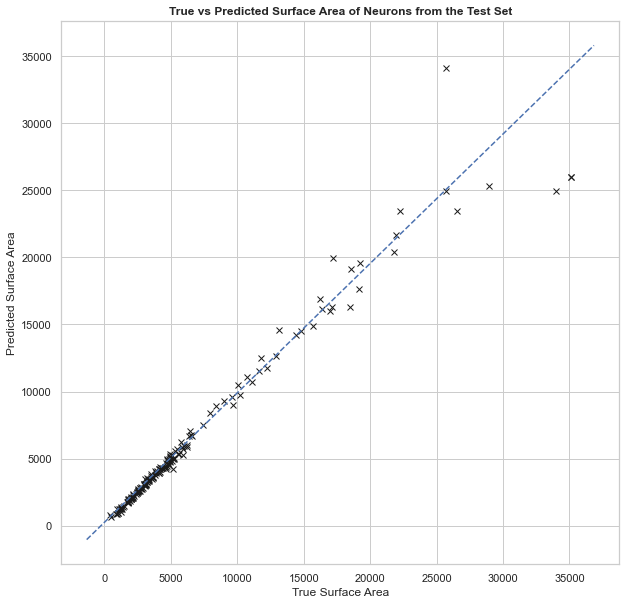

In [40]:
#Use predict function from the Random Forest Regressor 
#to predict the total surface area of a neuron from the test set
prediction = reg.predict(X_test)

#Then, I create a scatterplot for the true surface area 
#of a neuron (x-axis) versus the predicted surface area (y-axis)
plt.figure(figsize=(10,10))
plt.plot(y_test,prediction,'kx')
plt.plot(plt.xlim(), plt.ylim(), ls="--")
plt.xlabel('True Surface Area')
plt.ylabel('Predicted Surface Area')
plt.title('True vs Predicted Surface Area of Neurons from the Test Set',fontweight="bold")
plt.show()

**(d) Assess the performance of a random forest regression model with 5, 10, 20, 50,
100, 200, 500 and 1000 trees in predicting the total surface area of a neuron. You
should repeat the model fit and prediction 30 times for each number of trees, using
a different random state for each repeat. Create a plot of the model performance
as a function of the number of trees (use a log axis for the number of trees). The
plot should show the mean and standard error of the performance metric for each
number of trees. Discuss your findings.**

We may see in the plot and result below that the MSE decreases as the number of tree increases. We obtain the lowest MSE of mean and standard deviation when the number of trees are 1000.

Generally, more trees is equivalent to more features/parameters in our model. A higher number of features always reduces training error. This is simply due to the fact that if those additional features are unhelpful, then those features will not be used and the training error will at least remain the same as the model with fewer features$^4$.


In [41]:
from sklearn.metrics import mean_squared_error

#Create list that consist of 5, 10, 20, 50, 100, 200, 500 and 1000 trees 
trees = [5, 10, 20, 50, 100, 200, 500, 1000]

#Create random state range value
random_state = range(1,31)

#Initializing MSE list and dictionary
mse_list = []
mse_mean_dict = {}
mse_se_dict = {}

#Repeat the model fit and prediction 30 times for each number of trees, 
#using a different random state for each repeat
for tree in trees:
    for value in random_state:
        rfr = RandomForestRegressor(n_estimators = tree, random_state = value)
        rfr.fit(X_train, y_train)
        rfr_test_pred = rfr.predict(X_test)
        mse = mean_squared_error(y_test, rfr_test_pred)
        mse_list.append(mse)
        mse_array = np.array(mse_list)
        
        #Calculate MSE Mean
        mse_mean = np.mean(mse_array)
        
        #Calculate MSE Standard Error. The formula of standard error 
        #standard deviation divided by the sample size's square root
        mse_std = np.std(mse_array)
        mse_se = mse_std/np.sqrt(len(random_state))
        mse_mean_dict[str(tree)] = mse_mean
        mse_se_dict[str(tree)] = mse_se

In [42]:
#Creating new dataset consisting of tree, mse mean, and mse standard error using below code:
mse_mean_df = pd.DataFrame(list(mse_mean_dict.items()))
mse_mean_df.rename(columns = {0:'tree', 1:"mse_mean"}, inplace = True)


mse_se_df = pd.DataFrame(list(mse_se_dict.items()))
mse_se_df.rename(columns = {0:'tree', 1:"mse_se"}, inplace = True)

mse_df = pd.merge(mse_mean_df,mse_se_df,on=['tree'],how = 'inner')
print(mse_df)
print(mse_df.info())

   tree      mse_mean         mse_se
0     5  1.911145e+06  133440.742507
1    10  1.788562e+06  131286.327803
2    20  1.667164e+06  121332.733373
3    50  1.566631e+06  112777.309079
4   100  1.507238e+06  104609.862007
5   200  1.469564e+06   97376.502435
6   500  1.441122e+06   91216.568383
7  1000  1.420199e+06   86013.560322
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 0 to 7
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tree      8 non-null      object 
 1   mse_mean  8 non-null      float64
 2   mse_se    8 non-null      float64
dtypes: float64(2), object(1)
memory usage: 256.0+ bytes
None


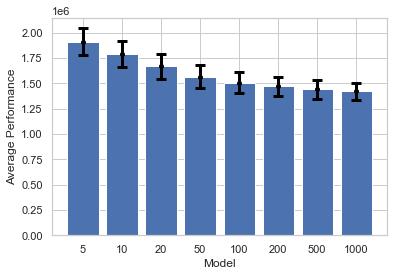

In [43]:
#Create the error bar
plt.errorbar(mse_df['tree'], 
             mse_df['mse_mean'], 
             yerr=mse_df['mse_se'], 
             fmt='o', color='Black', 
             elinewidth=3,capthick=3,
             errorevery=1, 
             alpha=1, ms=4, 
             capsize = 5)
#Create the bar plot
plt.bar(mse_df['tree'], 
        mse_df['mse_mean'],
        tick_label = mse_df['tree']) 
plt.xlabel('Model') 
plt.ylabel('Average Performance') 
plt.show()

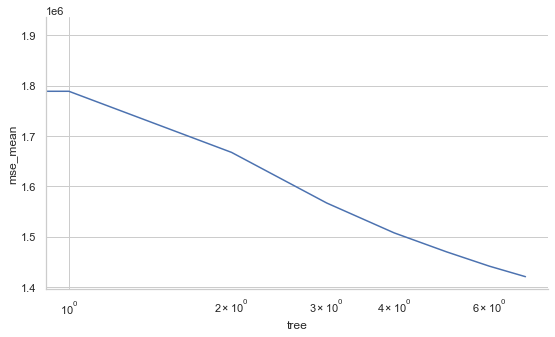

In [44]:
#Create lineplot with error band based on the standard error
fig, ax = plt.subplots(figsize=(9,5))
sns.lineplot(data=mse_df, 
             x="tree", 
             y="mse_mean", 
             ci='mse_se')
plt.xscale('log')
sns.despine()
plt.show()

**(e) Explain the rationale for fitting the model multiple time with different random states.**

Fitting the model multiple times with different random states can increase the model performance. Sometimes, we can get significant performance improvement for our model by running it multiple times with different random states. This is because random state is also a hyperparameter and we can tune it to get better results$^5$.

## Question 6 - Clustering algorithms to identify different neuron types


**(a) Perform a k-means cluster analysis, using the morphological measurements as the
features. Run the clustering algorithm for different numbers of clusters (integers
from 1 to 10). Plot the model performance as a function of the number of clusters
and identify the optimal number of clusters for this data.**

K-Means is an unsupervised machine learning algorithm that groups data into k number of clusters. The number of clusters is user-defined and the algorithm will try to group the data even if this number is not optimal for the specific case. Therefore we have to come up with a technique that somehow will help us decide how many clusters we should use for the K-Means model.

The Elbow method is a very popular technique and the idea is to run k-means clustering for a range of clusters. We are calculating the sum of squared distances from each point to its assigned center(distortions). When the distortions are plotted and the plot looks like an arm then the “elbow”(the point of inflection on the curve) is the best value of k.$^6$

We can see from the Elbow Method showing the optimal k below that the optimal k is 3.

In [45]:
#First, I create a new dataframe without column "id"
df_cluster = df_neurons_all.drop(['id'],axis=1)

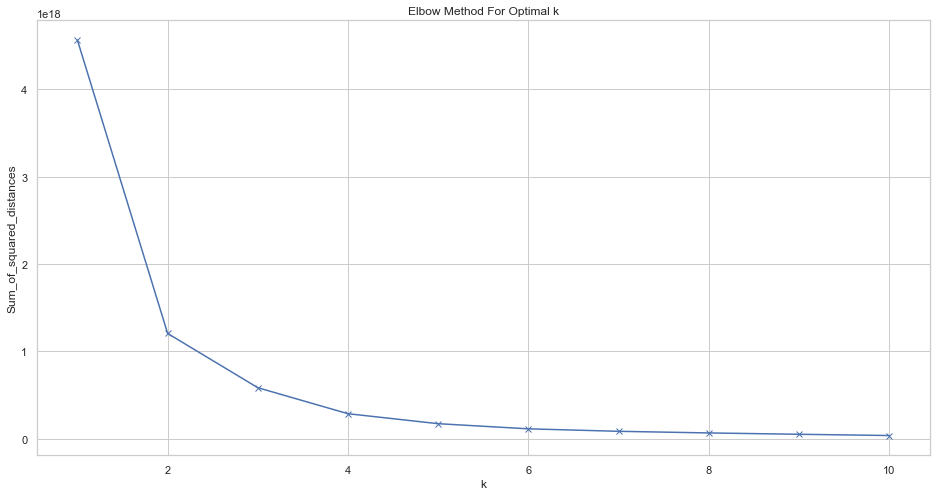

In [46]:
#Then, I plot the model performance as a function 
#of the number of clusters and 
#identify the optimal number of clusters for this data

from sklearn.cluster import KMeans

Sum_of_squared_distances = []
K = range(1,11)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_neurons_all)
    Sum_of_squared_distances.append(km.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

**(b) Perform a k-means cluster analysis, using the optimal number of clusters (identified in part (a)), and identify the most discriminatory variables. (Hint: Create histograms for each variable, with the data separated by cluster.)**

Here, I use the optimal number of clusters that I identified in part a which is 3 and identify most discriminatory variables. From the density plot that I created below, we can see that the discriminatory variables that show a clear difference between clusters (not overlapping between each other) are: total length, total surface, total volume, and number nodes.


In [47]:
#Fit K Means Clustering algorithm with k = 3
kmeans_model = KMeans(n_clusters = 3)
kmeans_model.fit(df_cluster)

#Creating a new column that shows which cluster 
#the neuron belongs to based on K Means clustering
df_cluster['kmeans_cluster'] = kmeans_model.labels_

<Figure size 1296x864 with 0 Axes>

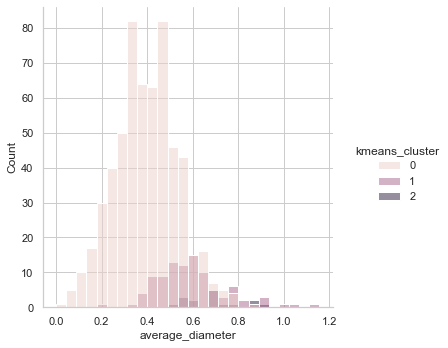

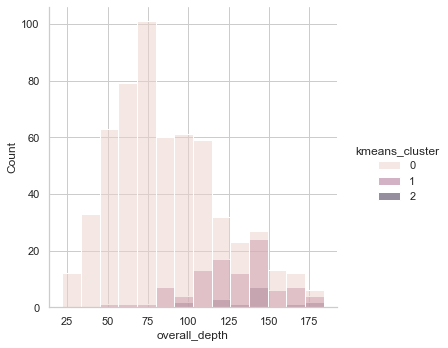

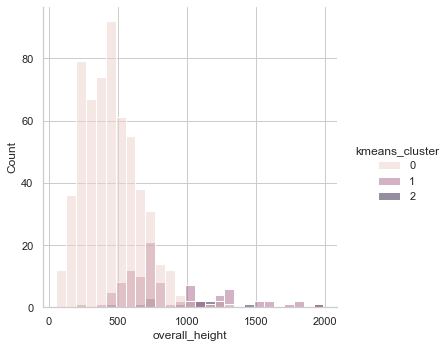

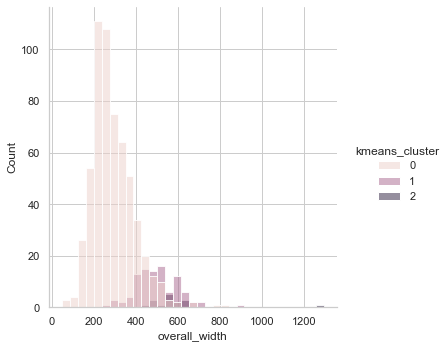

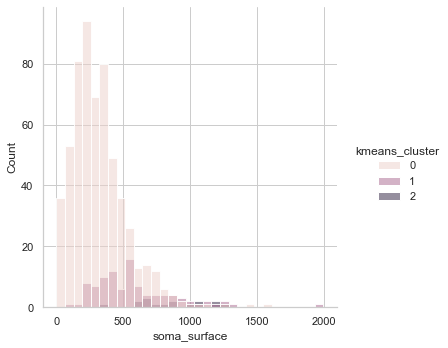

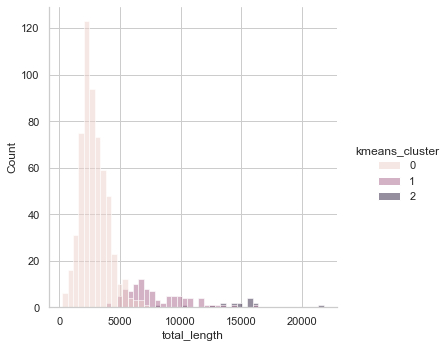

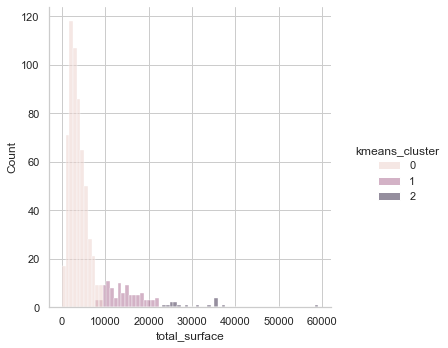

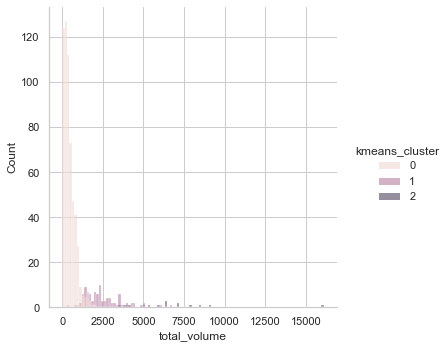

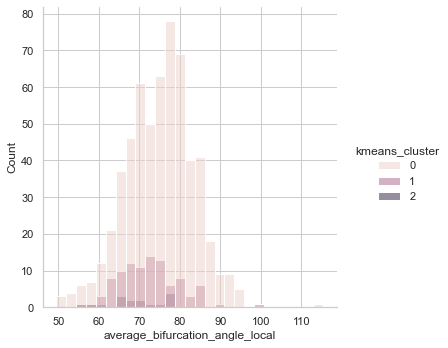

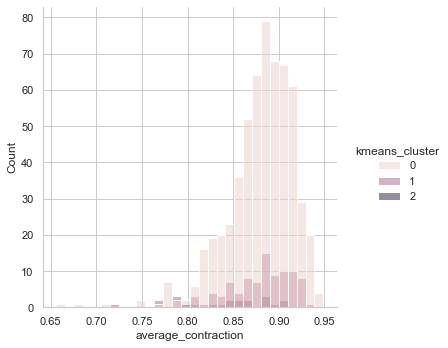

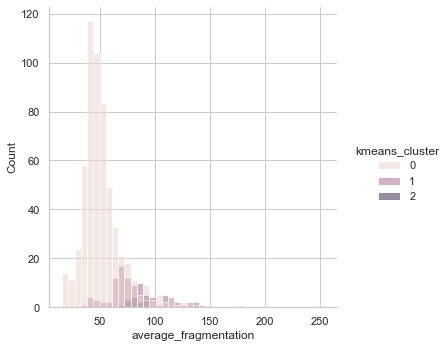

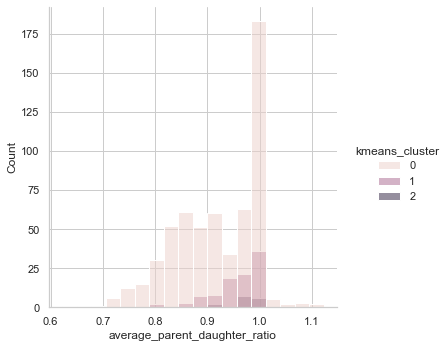

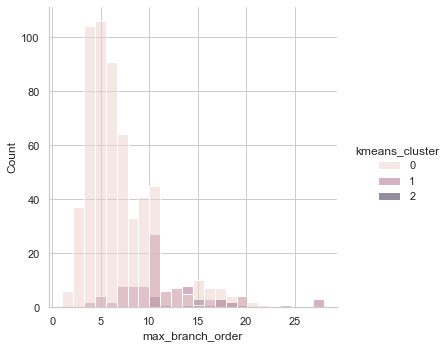

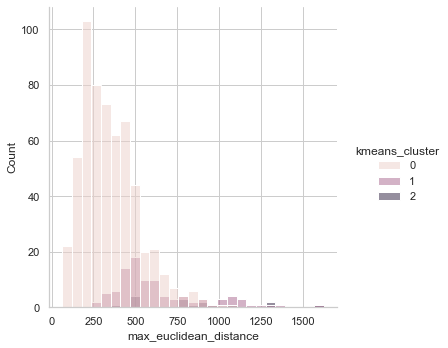

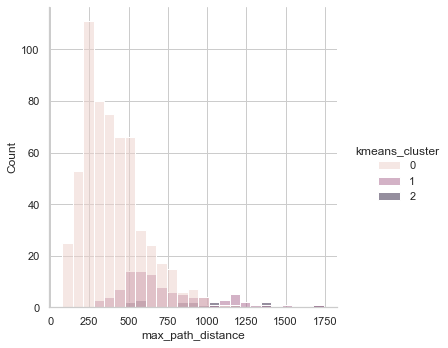

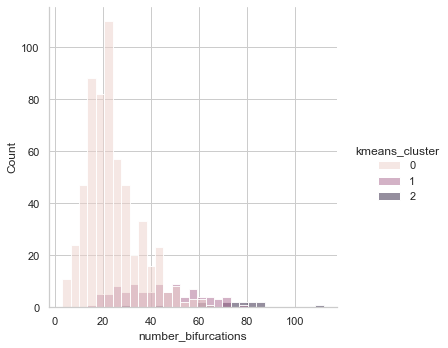

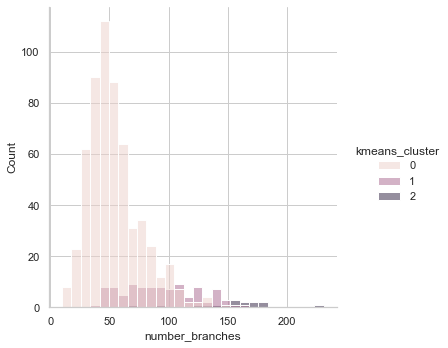

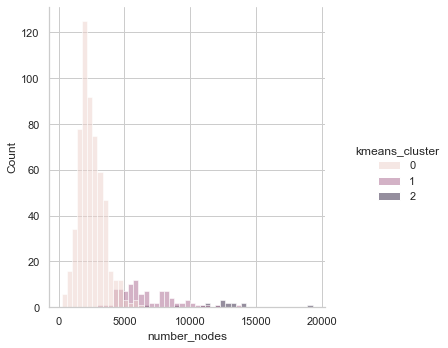

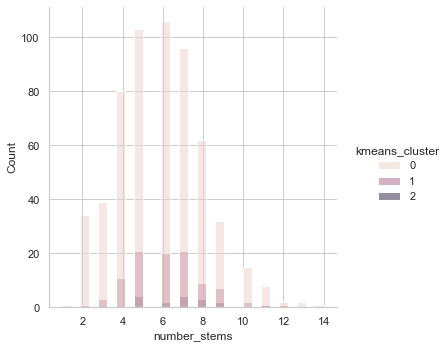

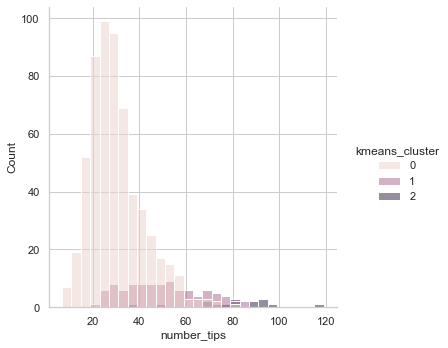

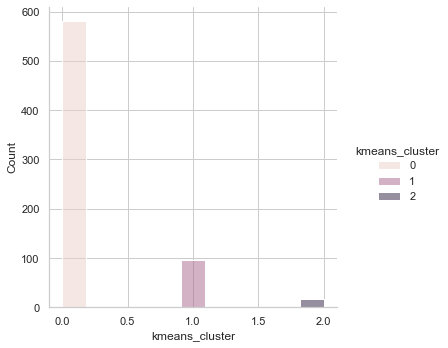

In [48]:
#First, I create a list containing all the feature names
col_list = df_cluster.columns.to_list()

#Then, I Create histogram plot for each feature 
plt.figure(figsize=(18,12))

for feature in col_list:
    sns.displot(data = df_cluster, x= feature, hue="kmeans_cluster")
plt.show()

**(c) Create a series of scatter plots for the most discriminatory variables, colouring the points by cluster number. Discuss your findings. Do your findings support the claim that multiple categories of neurons, with distinctly different morphological properties, are included in this dataset?**

From the scatterplot below, we can see clearly that the discriminatory variables (total length, total surface, total volume, and number nodes) are mostly difference between clusters (not overlapping between each other).



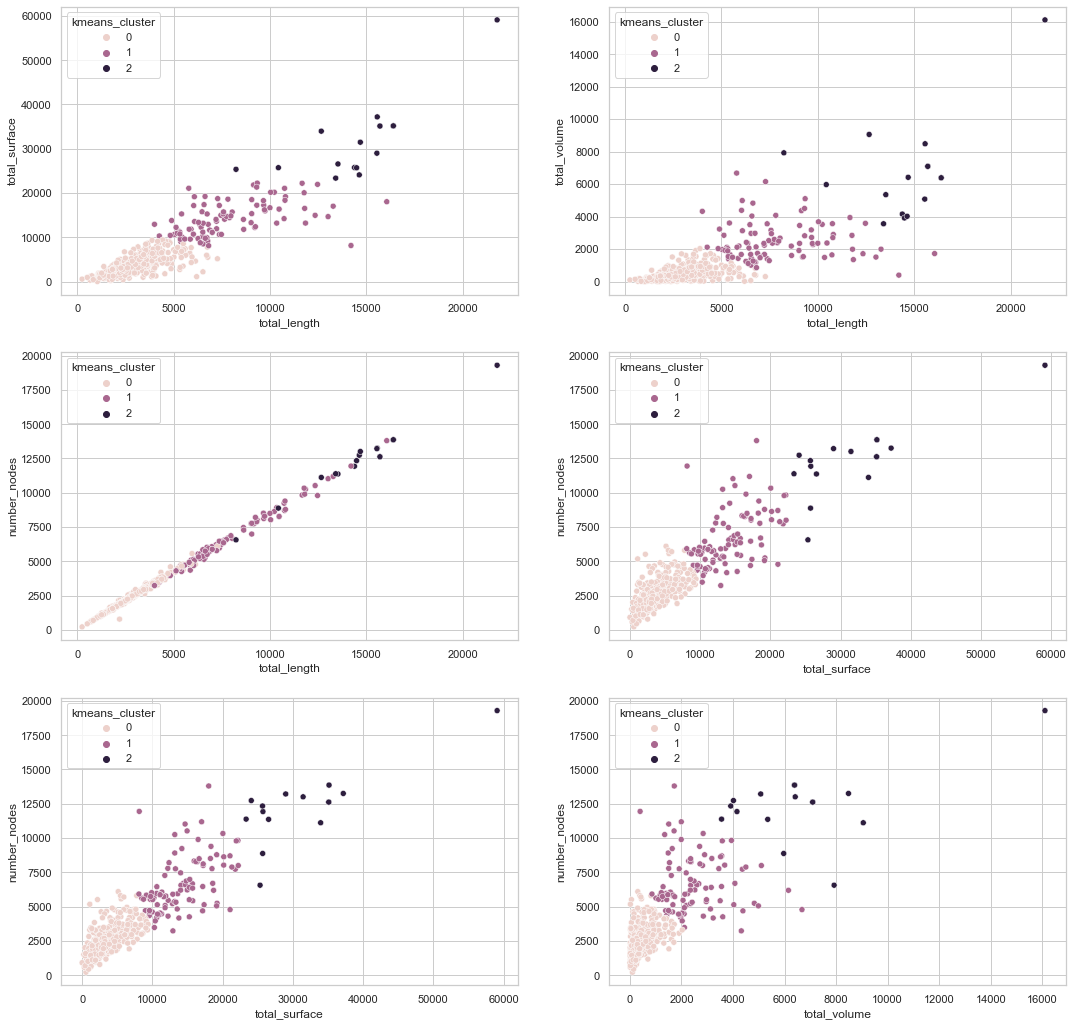

In [49]:
sns.set(style="whitegrid")

fig,axs = plt.subplots(3,2, figsize = (18,18))

#Scatterplot between number nodes and total length measurements
sns.scatterplot(data = df_cluster, 
                x = "total_length", 
                y ="total_surface", 
                hue = 'kmeans_cluster', 
                ax=axs[0, 0])

#Scatterplot between number tips and number branches measurements
sns.scatterplot(data= df_cluster, 
                x="total_length",
                y="total_volume", 
                hue = 'kmeans_cluster', 
                ax=axs[0, 1])

#Scatterplot between number branches and number bifurcations measurements
sns.scatterplot(data=df_cluster, 
                x="total_length", 
                y="number_nodes", 
                hue = 'kmeans_cluster', 
                ax=axs[1, 0])

#Scatterplot between number tips and number bifurcations measurements
sns.scatterplot(data=df_cluster, 
                x="total_surface", 
                y="number_nodes", 
                hue = 'kmeans_cluster', 
                ax=axs[1, 1])

#Scatterplot between number branches and number bifurcations measurements
sns.scatterplot(data=df_cluster, 
                x="total_surface", 
                y="number_nodes", 
                hue = 'kmeans_cluster', 
                ax=axs[2, 0])

#Scatterplot between number tips and number bifurcations measurements
sns.scatterplot(data=df_cluster, 
                x="total_volume", 
                y="number_nodes", 
                hue = 'kmeans_cluster', 
                ax=axs[2, 1])

plt.show()

**(d) Identify another clustering algorithm that may be suitable for this data. Give an
overview of your chosen algorithm and discuss the type of problems it works best for.
Repeat part (a)–(c) using your chosen algorithm. Discuss your results in relation
to those from the k-means cluster analysis.**

In this part, I use Balanced Iterative Reducing and Clustering using Hierarchies (BIRCH) method. BIRCH deals with large datasets by first generating a more compact summary that retains as much distribution information as possible, and then clustering the data summary instead of the original dataset. BIRCH actually complements other clustering algorithms by virtue if the fact that different clustering algorithms can be applied to the summary produced by BIRCH. BIRCH can only deal with metric attributes (similar to the kind of features KMEANS can handle). A metric attribute is one whose values can be represented by explicit coordinates in an Euclidean space (no categorical variables).$^7$

From the histogram plot that I created below, we can see that the discriminatory variables that show a clear difference between clusters (not overlapping between each other) are: total length, total surface, total volume, and number nodes. 

We obtain the same variables as the variables in the K-Means Clustering method.

In [50]:
from sklearn.cluster import Birch

#Fit the Birch Clustering algorithm with k = 3
birch_model = Birch(n_clusters = 3)
birch_model.fit(df_cluster)

#Creating a new column that shows which cluster 
#the neuron belongs to based on K Means clustering
df_cluster['birch_cluster'] = birch_model.labels_

<Figure size 1296x864 with 0 Axes>

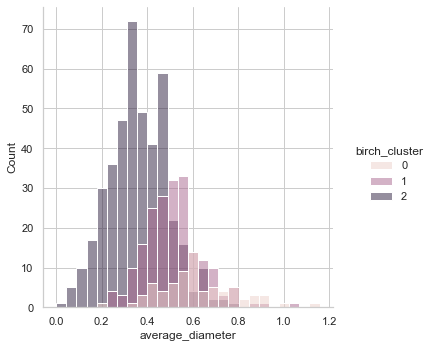

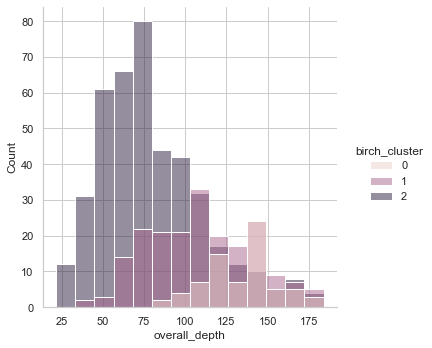

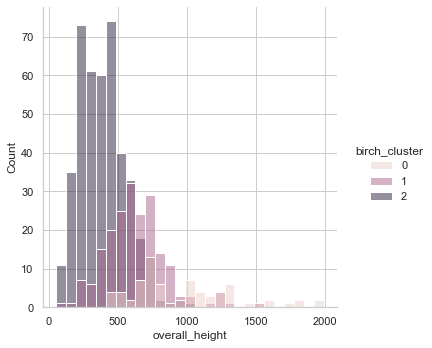

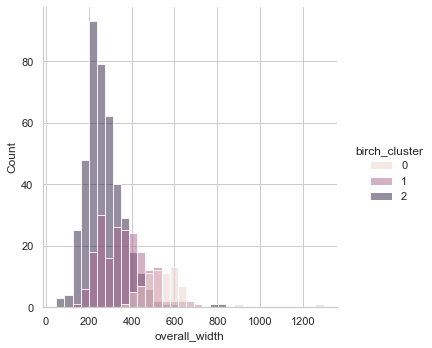

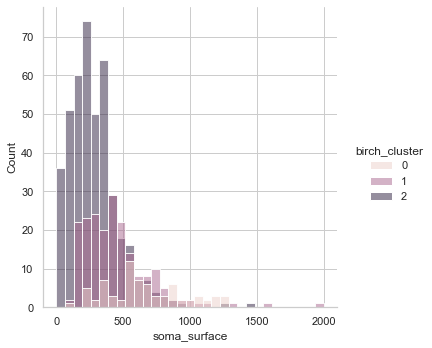

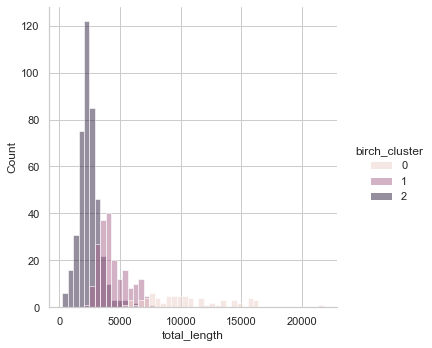

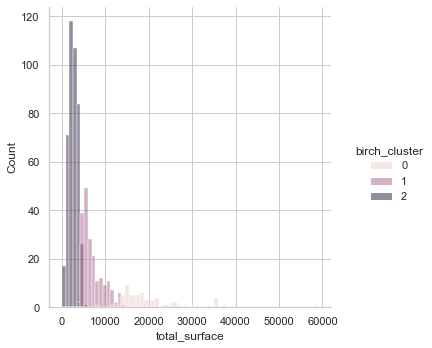

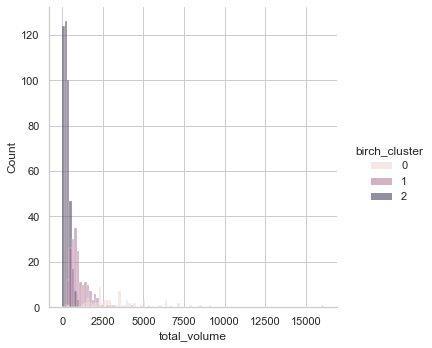

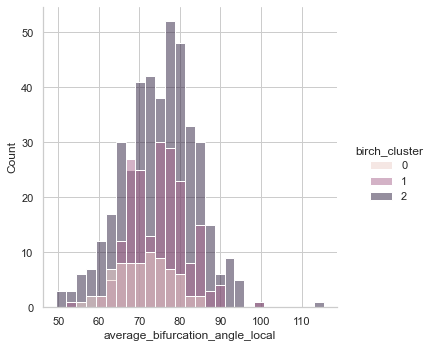

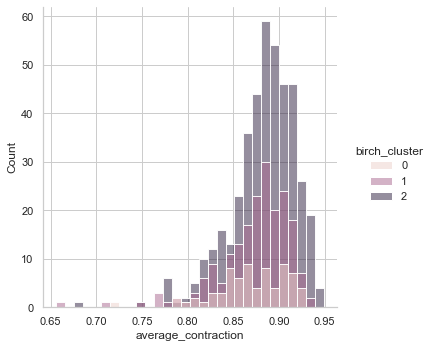

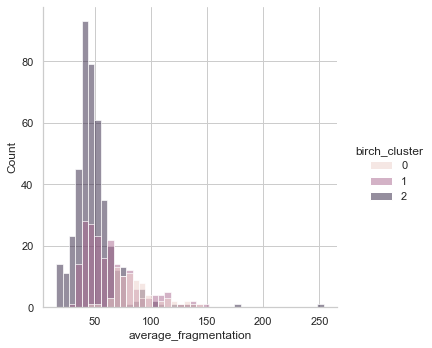

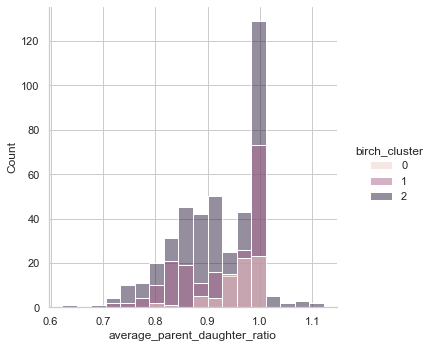

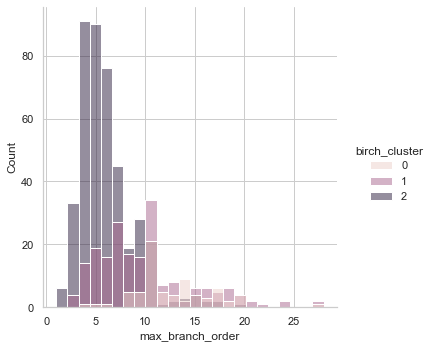

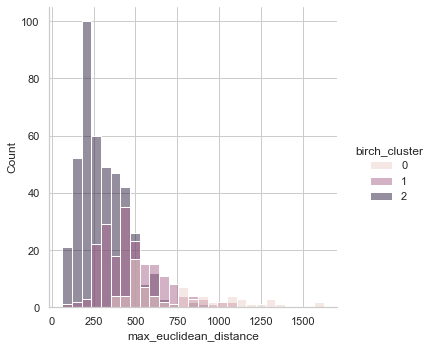

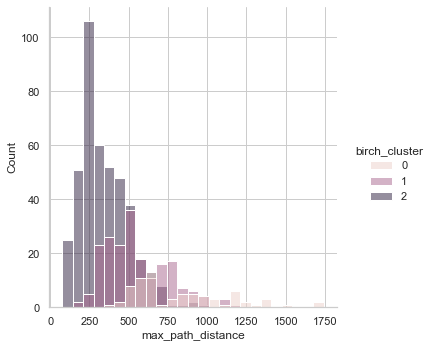

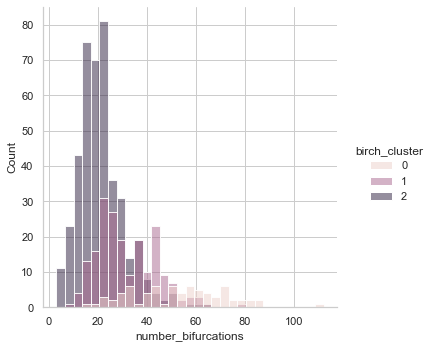

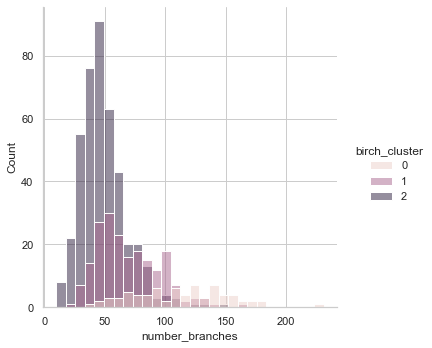

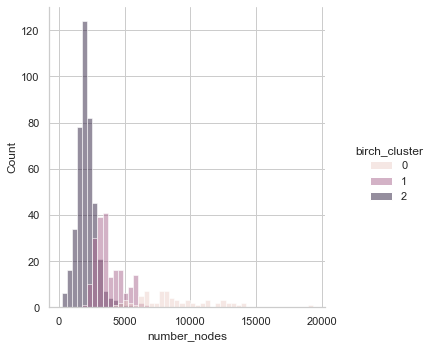

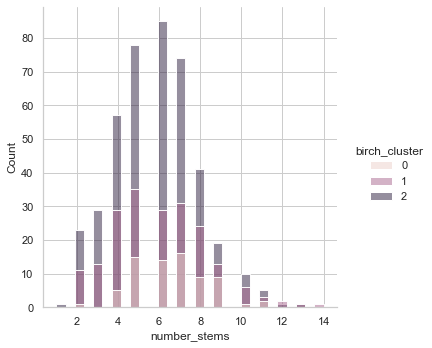

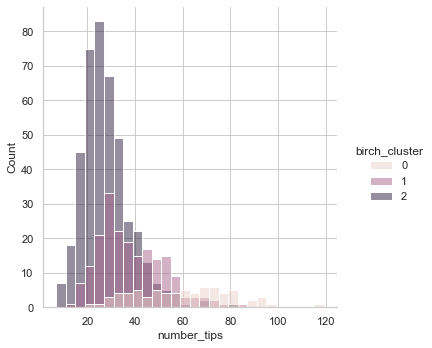

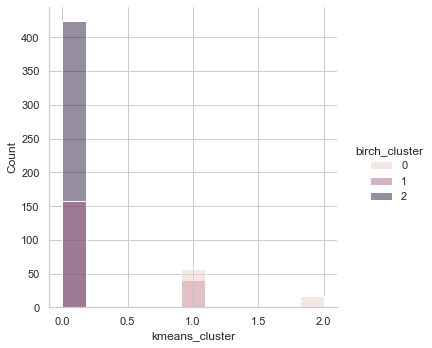

In [51]:
#Create histogram plot for each feature 
plt.figure(figsize=(18,12))

for feature in col_list:
    sns.displot(data = df_cluster, 
                x= feature, 
                hue="birch_cluster")
plt.show()

From the scatterplot below, we can see clearly that the discriminatory variables (total length, total surface, total volume, and number nodes) are mostly difference between clusters (not overlapping between each other).

We obtained the same result as what we have assesed in K Clustering analysis part.

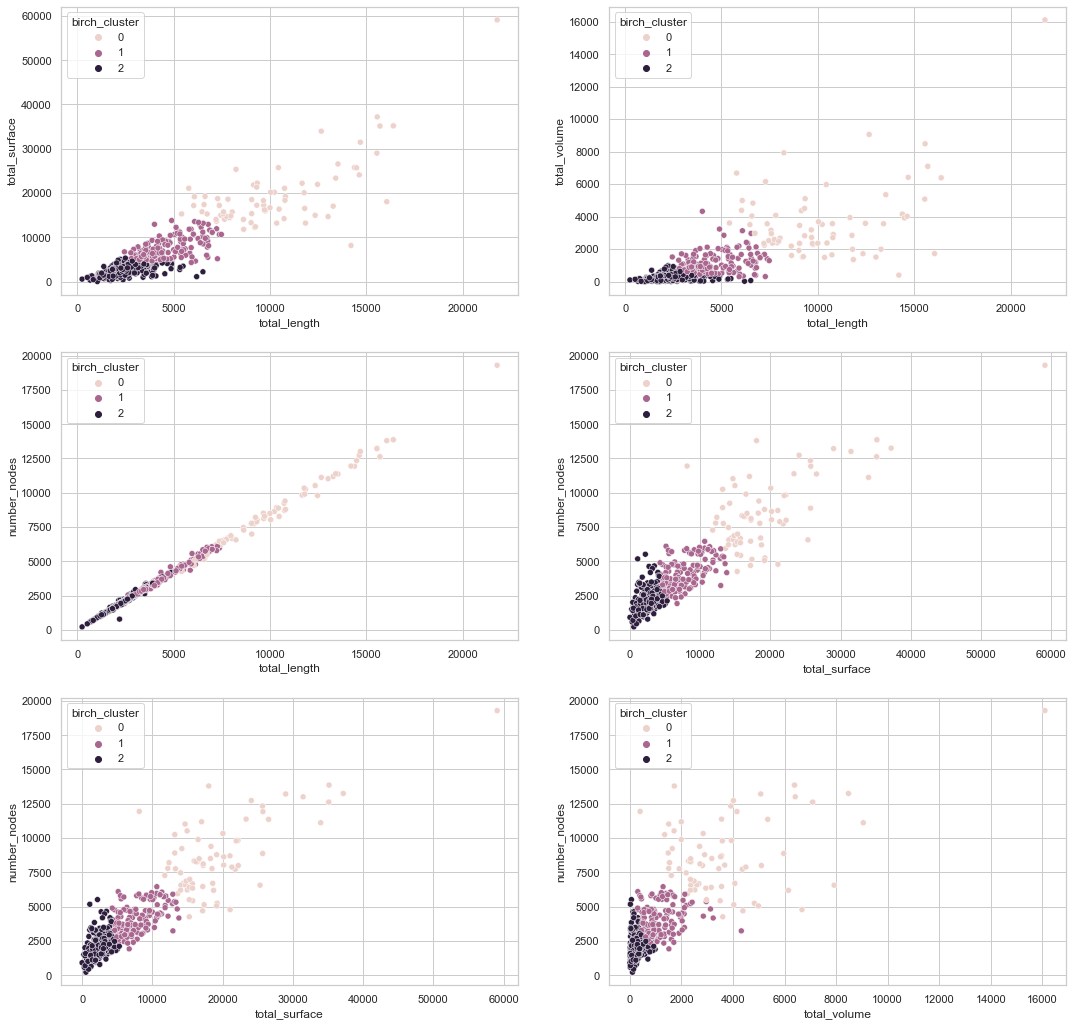

In [52]:
sns.set(style="whitegrid")

fig,axs = plt.subplots(3,2, figsize = (18,18))

#Scatterplot between number nodes and total length measurements
sns.scatterplot(data = df_cluster, 
                x = "total_length", 
                y ="total_surface", 
                hue = 'birch_cluster', 
                ax=axs[0, 0])

#Scatterplot between number tips and number branches measurements
sns.scatterplot(data= df_cluster, 
                x="total_length", 
                y="total_volume", 
                hue = 'birch_cluster', 
                ax=axs[0, 1])

#Scatterplot between number branches and number bifurcations measurements
sns.scatterplot(data=df_cluster, 
                x="total_length", 
                y="number_nodes", 
                hue = 'birch_cluster', 
                ax=axs[1, 0])

#Scatterplot between number tips and number bifurcations measurements
sns.scatterplot(data=df_cluster, 
                x="total_surface", 
                y="number_nodes", 
                hue = 'birch_cluster', 
                ax=axs[1, 1])

#Scatterplot between number branches and number bifurcations measurements
sns.scatterplot(data=df_cluster, 
                x="total_surface", 
                y="number_nodes", 
                hue = 'birch_cluster', 
                ax=axs[2, 0])

#Scatterplot between number tips and number bifurcations measurements
sns.scatterplot(data=df_cluster, 
                x="total_volume", 
                y="number_nodes", 
                hue = 'birch_cluster', 
                ax=axs[2, 1])

plt.show()

## References

$^1$ “T-Test: What It Is With Multiple Formulas and When to Use Them.” Investopedia, 20 July 2022, www.investopedia.com/terms/t/t-test.asp.

$^2$ “AIC/BIC in Model Selection.” AIC/BIC in Model Selection, www.linkedin.com/pulse/aicbic-model-selection-richard-randa. Accessed 10 Dec. 2022.

$^3$ Bevans, Rebecca. “Akaike Information Criterion | When and How to Use It (Example).” Scribbr, 26 Mar. 2020, www.scribbr.com/statistics/akaike-information-criterion.

$^4$ “Why Does Mean Squared Error D.ecrease When the Number of Trees Is Increased in Random Forest?” Stack Overflow, 10 May 2019, stackoverflow.com/questions/56084637/why-does-mean-squared-error-decrease-when-the-number-of-trees-is-increased-in-ra

$^5$ Pramoditha, Rukshan. “Why Do We Set a Random State in Machine Learning Models?” Medium, 2 May 2022, towardsdatascience.com/why-do-we-set-a-random-state-in-machine-learning-models-bb2dc68d8431.

$^6$ Durukan, Emre. “K-Means Clustering in Python.” Medium, 9 July 2022, medium.com/swlh/k-means-clustering-in-python-6c2d7ea01af1.

$^7$ Maklin, Cory. “BIRCH Clustering Algorithm Example in Python.” Medium, 9 May 2022, towardsdatascience.com/machine-learning-birch-clustering-algorithm-clearly-explained-fb9838cbeed9.

**“I confirm that all work submitted is my own and that I have neither given, sought,
nor received aid in relation to this assignment.”**